# 使用方式
涵盖了一些基本用法模式和最佳实践以帮助开始使用Matplotlib。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 一个简单例子
Matplotlib 在图形（即窗口、Jupyter 小部件等）上绘制数据，每个图形可以包含一个或多个轴（可以根据 xy 坐标指定点的区域，或极坐标中的 theta-r 绘图，或 xyz 中的 3D 绘图等）。 使用轴创建图形的最简单方法是使用 pyplot.subplots。 然后我们可以使用 Axes.plot 在轴上绘制一些数据：

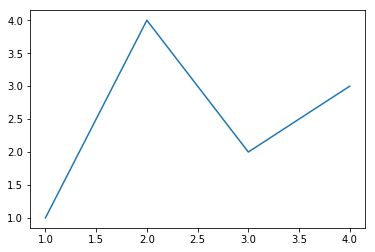

In [2]:
fig, ax = plt.subplots()#创建一个包含单个轴的图窗。
ax.plot([1,2,3,4],[1,4,2,3])
plt.show()

许多其他绘图库或语言不需要显式地创建轴。例如，在MATLAB中，我们可以这样做
```matlab
plot([1, 2, 3, 4], [1, 4, 2, 3])  % MATLAB plot.
```
就可以得到想要的图像

事实上，你可以在 Matplotlib 中做同样的事情：对于每个 Axes 绘图方法，在 matplotlib.pyplot 模块中有一个相应的函数在“当前”轴上执行该绘图，如果它们创建该轴（及其父图形） 还不存在。 所以，前面的例子可以更简短地写成



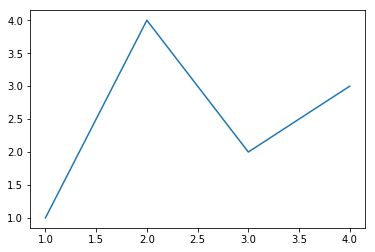

In [3]:
plt.plot([1,2,3,4],[1,4,2,3])
plt.show()

## 图的组成部分
现在，让我们更深入地了解 Matplotlib 图形的组成部分。

![anatomy.png](https://matplotlib.org/stable/_images/anatomy.png)

### 图 figure
整个图。 该图形跟踪所有子轴、少量“特殊”艺术家（标题、图形图例等）和画布。 （不要太担心画布，这是至关重要的，因为它是实际进行绘图以获取绘图的对象，但作为用户，它或多或少对您不可见）。 一个图形可以包含任意数量的轴，但通常至少有一个。

创建新图形的最简单方法是使用pyplot：


```python
fig = plt.figure()#一个没有轴的空图形
fig, ax = plt.subplots()#具有单个轴的图形
fig, axs = plt.subplots(2,2)#一个带有 2x2 轴网格的图形
```

与图形一起创建轴很方便，但也可以稍后添加轴，从而实现更复杂的轴布局。

### 轴 Axes


> **Axes** is generally what you mean as plot or chart. Each Axes object belongs to only one Figure, and is characterized by two Artist Axis (three in the three-dimensional case). Also other objects such as the title, the x label and y label belong to this composite artist.

“绘图”是具有数据空间的图像区域。 一个给定的图形可以包含多个 Axes，但一个给定的 Axes 对象只能在一个 Figure 中。 Axes 包含两个（在 3D 的情况下为三个）Axis 对象（**注意 Axes 和 Axis 之间的区别**），它们负责处理数据限制（也可以通过 axes.Axes.set_xlim() 和axes.Axes.set_ylim() 方法控制数据限制）。 每个轴都有一个标题（通过 set_title() 设置）、一个 x 标签（通过 set_xlabel() 设置）和一个 y 标签（通过 set_ylabel() 设置）。

Axes 类及其成员函数是使用 OO 接口的主要入口点。

### Axis

> **Axis** objects that take into account the numerical values to be represented on Axes, define the limits, and manage the ticks (the mark on the axes) and tick labels (the label text represented on each tick). The position of the tick is adjusted by an object called Locator while formatting tick label is regulated by an object called Formatter.

这是类似数轴的对象。 他们负责设置图形限制并生成刻度（轴上的标记）和刻度标签（标记刻度的字符串）。 刻度的位置由 Locator 对象确定，刻度标签字符串由 Formatter 格式化。 正确的 Locator 和 Formatter 的组合可以非常精细地控制刻度位置和标签。

### Artist

基本上，您可以在图形上看到的所有内容都是 Artist（甚至图形、轴和轴对象）。 这包括 Text 对象、Line2D 对象、集合对象、Patch 对象......（你懂的）。 当图形被渲染时，所有的 Artist 都被绘制到画布（canvas）上。 大多数 Artist 都与 Axes 相关联； 这样的 Artist 不能被多个 Axes 共享，也不能从一个移到另一个。

## Types of inputs to plotting functions plotting fc的输入类型

所有绘图函数都期望 numpy.array 或 [numpy.ma.masked_array](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy.ma.masked_array) 作为输入。 “类似数组”的类，例如 [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas) 数据对象和 [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) 可能会也可能不会按预期工作。 最好在绘图之前将它们转换为 [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) 对象。

例如，要转换一个 [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

```python
a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values
```

转换一个 numpy.matrix

```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```

## The object-oriented interface and the pyplot interface 面向对象界面和pyplot界面

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").  显式创建图形和轴，并在它们上调用方法（“面向对象 (OO) 风格”）。
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.  依靠pyplot自动创建和管理图形和轴，并使用pyplot函数进行绘图。

OO-style:



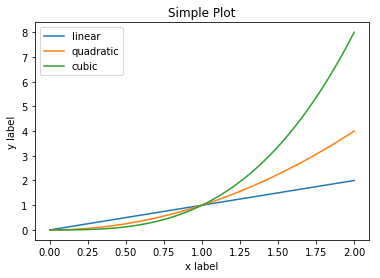

In [4]:
x = np.linspace(0, 2, 100)

#Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
#请注意，即使在 OO 样式中，我们也使用 `.pyplot.figure` 来创建图形。
fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')#设置标题
ax.legend()#添加图例
plt.show()



或者 pyplot-style：

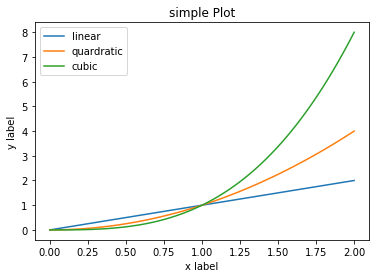

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quardratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("simple Plot")
plt.legend()#add a legend 添加图例
plt.show()

此外，还有第三种方法，用于在 GUI 应用程序中嵌入 Matplotlib 的情况，它完全丢弃 pyplot，甚至用于图形创建。 我们不会在这里讨论它； 有关更多信息，请参阅图库中的相应部分（[在图形用户界面中嵌入 Matplotlib](https://matplotlib.org/stable/gallery/index.html#user-interfaces)）

Matplotlib 的文档和示例同时使用 OO 和 pyplot 方法（它们同样强大），应该随意使用其中任何一个（**但是，最好选择其中之一并坚持使用，而不是混合使用它们**）。

In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project).  通常，我们建议将 pyplot 限制为交互式绘图（例如，在 Jupyter 笔记本中），并且更建议 OO 风格的非交互式绘图（在打算复用的函数和脚本作为一个更大项目的一部分） 

> **Note 注意**
>
> 在更旧的例子，您可能会发现，通过`from pylab import *`而不是用所谓pylab接口的例子。这个 star-import 从 pyplot 和 numpy 中导入所有内容，这样就可以做到
>
> ```python
> x = linspace(0, 2, 100)
> plot(x, x, label='linear')
> ...
> ```
>
> 一个更MATLAB风格。 **强烈劝阻和不建议使用这种方法。**

通常，人们会发现自己一遍又一遍地绘制相同的图，但使用不同的数据集，这导致需要编写专门的函数来进行绘图。 推荐的函数签名类似于：

[-0.40653994  0.07456718  0.68734117  0.22145688  0.22816336 -0.05985727
 -0.09352594  0.22970328  0.58270033  0.50957174 -1.68670872 -1.05757036
  0.04743959  0.12366359  0.75045841 -0.38616607  1.18453587 -0.45317476
 -0.59363182  0.40048923 -1.44782873  0.71025033 -0.42404091  0.57860073
  0.48245131 -1.69013155  0.95062676  1.8833664  -0.21186922 -1.09665135
 -0.77746862 -0.2080217  -1.32970116  0.09104754 -0.68899862  0.17248367
  0.84447165  0.79054064  0.58629186  0.83743244 -1.23934513 -0.48990493
  0.00336811 -0.06332016  1.29241813  0.62559392 -0.84368932 -1.24684691
 -0.24573806 -0.21274709  0.28450604 -0.28909068  0.44347387 -0.80112201
  0.94670725 -0.29918276  0.3306556  -0.35699657 -0.07429455 -0.48626136
  0.12507613  0.63887933  2.46504754  0.92399466  0.06597754  2.22652281
 -0.02984141  0.8304828   0.47082752  0.85480352 -0.23306821  1.27837575
  0.30255332 -1.3631617  -1.19009565 -0.78951238 -0.46495477 -0.7038297
  0.70130971 -1.19172784 -0.4571453   0.12576862  0.

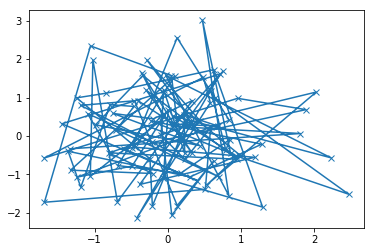

In [9]:

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot
       传递给 ax.plot 的 kwargs 字典

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4,100)
print(data1, data2)
fig, ax = plt.subplots(1,1)
my_plotter(ax, data1, data2, {'marker':'x'})
plt.show()

或者如果你想有 2 个子图：

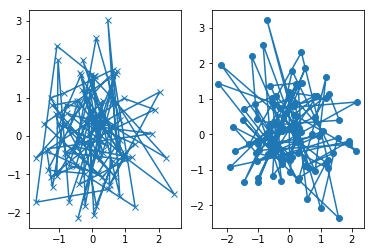

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})
plt.show()

对于这些简单的例子，这种风格似乎有点矫枉过正，但是一旦图表变得稍微复杂一点，它就会得到回报。

## Backends 后端

### What is a backend?

网站和邮件列表中的许多文档都提到了“backend”，许多新用户对这个术语感到困惑。 Matplotlib 针对许多不同的用例和输出格式。 有些人从 python shell 交互式地使用 Matplotlib，并在他们键入命令时弹出绘图窗口。 有些人运行 Jupyter notebook 并绘制内联图以进行快速数据分析。 其他人将 Matplotlib 嵌入到 PyQt 或 PyGObject 等图形用户界面中以构建丰富的应用程序。 有些人在批处理脚本中使用 Matplotlib 从数值模拟中生成 postscript 图像，还有一些人运行 Web 应用程序服务器来动态提供图形。

为了支持所有这些用例，Matplotlib 可以针对不同的输出，这些功能中的每一个都称为后端； “前端”是面向用户的代码，即绘图代码，而“后端”在幕后完成所有艰苦的工作以制作图形。 有两种类型的后端：用户界面后端（用于 PyQt/PySide、PyGObject、Tkinter、wxPython 或 macOS/Cocoa）； 也称为“交互式后端”）和硬拷贝后端以制作图像文件（PNG、SVG、PDF、PS；也称为“非交互式后端”）。

......更多见这里 ::point_right: [传送门](https://matplotlib.org/stable/tutorials/introductory/usage.html#backends)

## What is interactive mode? 什么是交互模式

使用交互式后端（请参阅[什么是后端？](https://matplotlib.org/stable/tutorials/introductory/usage.html#what-is-a-backend)）允许——但其本身不需要或确保——绘制到屏幕上。 是否以及何时发生绘图到屏幕，以及在屏幕上绘制绘图后脚本或 shell 会话是否继续，取决于调用的函数和方法，以及确定 Matplotlib 是否处于“交互模式”的状态变量 ”。

...... [传送门](https://matplotlib.org/stable/tutorials/introductory/usage.html#what-is-interactive-mode)

## Performance 性能

无论是在交互模式下探索数据还是以编程方式保存大量绘图，渲染性能都可能是pipeline中的一个痛苦瓶颈（rendering performance can be a painful bottleneck in your pipeline）。 Matplotlib 提供了几种方法来大大减少渲染时间，但代价是绘图外观的微小变化（可设置的容差）。 可用于减少渲染时间的方法取决于正在创建的绘图类型。

...... [传送门